# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [209]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Ingest Data  

In [3]:
df_org = pd.read_excel("World military power.xlsx")
df = df_org.copy()
df.head(5).T

,0,1,2,3,4
Military Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Military Strength Power Index,1.344,2.314,0.466,0.838,0.652
Aircraft Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Aircraft Strength value,260,19,551,295,227
Fighter/Interceptor Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Fighter/Interceptor Strength value,0,0,103,72,24
Attack Aircraft Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Attack Aircraft Strength value,25,0,22,18,7
Transport Aircraft Fleet Strength,Afghanistan,Albania,Algeria,Angola,Argentina
Transport Aircraft Fleet Strength value,30,0,59,30,9


## EDA

## Implement basic steps to see how is your data looks like

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength                        138 non-null    object 
 3   Aircraft Strength value                  138 non-null    int64  
 4   Fighter/Interceptor Strength             138 non-null    object 
 5   Fighter/Interceptor Strength value       138 non-null    int64  
 6   Attack Aircraft Strength                 138 non-null    object 
 7   Attack Aircraft Strength value           138 non-null    int64  
 8   Transport Aircraft Fleet Strength        138 non-null    object 
 9   Transport Aircraft Fleet Strength value  138 non-null    int64  
 10  Trainer Aircraft Fleet                   138 non-n

## Convert multi index columns to one level

In [5]:
df1 = pd.concat([df.iloc[:,0],df.iloc[:,1::2]], axis=1)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength                        138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [7]:
df1.columns = df1.columns.str.lower().str.replace(" ","_")

## Check for missing values 

In [8]:
df1.loc[:,df1.isnull().sum()!=0].isnull().sum()

navy_fleet_strengths_value               14
aircraft_carrier_fleet_strength_value    23
submarine_fleet_strength_value           23
destroyer_fleet_strength_value           23
frigate_fleet_strength_value             23
total_coastline_coverage_value           29
total_border_coverage_value               9
dtype: int64

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [9]:
df1["navy_fleet_strengths_value"].describe()

count   124.000
mean     84.984
std     146.114
min       0.000
25%      10.000
50%      38.000
75%      77.750
max     984.000
Name: navy_fleet_strengths_value, dtype: float64

**It is seem that all null values of navy_fleet_strengths_value is 0. Ref:https://www.globalfirepower.com/navy-ships.php**

In [10]:
df1["navy_fleet_strengths_value"].fillna(0, inplace=True)

In [11]:
df1["navy_fleet_strengths_value"].isnull().sum()

0

**It is seem that all null values of navy_fleet_strengths_value is 0. Ref:https://www.globalfirepower.com/navy-aircraft-carriers.php**

In [12]:
df1["aircraft_carrier_fleet_strength_value"].value_counts()

0.000     102
2.000       6
1.000       4
4.000       2
20.000      1
Name: aircraft_carrier_fleet_strength_value, dtype: int64

In [13]:
df1[df1["aircraft_carrier_fleet_strength_value"].isnull() == True]

,military_strength,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
5,Armenia,2.125,64,0,9,3,13,37,20,110,...,11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570.000
7,Austria,0.957,120,15,0,11,32,62,0,56,...,52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524.000
11,Belarus,0.818,202,39,68,4,28,63,21,532,...,65,32000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500,3599.000
13,Bhutan,10.168,2,0,0,0,0,2,0,0,...,2,0,2000,0,"1,76,808","7,66,397",38394,NaN,0,1136.000
16,Botswana,2.058,45,10,0,11,8,16,0,55,...,74,0,16500,0,"9,62,617","22,49,104","5,81,730",NaN,0,4347.000
19,Burkina Faso,1.901,16,0,3,1,4,8,2,0,...,23,0,10500,0,"78,00,000","1,97,42,715","2,74,200",NaN,0,3611.000
23,Central African Republic,3.289,3,0,0,2,0,1,0,4,...,39,0,4500,0,"23,48,581","57,45,062","6,22,984",NaN,2800,5920.000
24,Chad,1.638,35,0,6,6,4,17,3,60,...,59,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0,6406.000
30,Czechia,0.553,95,12,16,8,15,44,15,116,...,128,2000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867,NaN,664,2046.000
38,Ethiopia,0.858,86,24,0,9,20,33,8,400,...,57,0,55000,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.000


In [14]:
df1["aircraft_carrier_fleet_strength_value"].fillna(0,inplace=True)

In [15]:
df1["aircraft_carrier_fleet_strength_value"].isnull().sum()

0

**It is seem that all null values of submarine_fleet_strength_value is 0. Ref:https://www.globalfirepower.com/navy-submarines.php**

In [16]:
df1[df1["submarine_fleet_strength_value"].isnull() == True]

,military_strength,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
5,Armenia,2.125,64,0,9,3,13,37,20,110,...,11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570.000
7,Austria,0.957,120,15,0,11,32,62,0,56,...,52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524.000
11,Belarus,0.818,202,39,68,4,28,63,21,532,...,65,32000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500,3599.000
13,Bhutan,10.168,2,0,0,0,0,2,0,0,...,2,0,2000,0,"1,76,808","7,66,397",38394,NaN,0,1136.000
16,Botswana,2.058,45,10,0,11,8,16,0,55,...,74,0,16500,0,"9,62,617","22,49,104","5,81,730",NaN,0,4347.000
19,Burkina Faso,1.901,16,0,3,1,4,8,2,0,...,23,0,10500,0,"78,00,000","1,97,42,715","2,74,200",NaN,0,3611.000
23,Central African Republic,3.289,3,0,0,2,0,1,0,4,...,39,0,4500,0,"23,48,581","57,45,062","6,22,984",NaN,2800,5920.000
24,Chad,1.638,35,0,6,6,4,17,3,60,...,59,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0,6406.000
30,Czechia,0.553,95,12,16,8,15,44,15,116,...,128,2000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867,NaN,664,2046.000
38,Ethiopia,0.858,86,24,0,9,20,33,8,400,...,57,0,55000,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.000


In [17]:
df1["submarine_fleet_strength_value"].fillna(0,inplace=True)

In [18]:
df1["submarine_fleet_strength_value"].isnull().sum()

0

**It is seem that all null values of destroyer_fleet_strength_value is 0. Ref:https://www.globalfirepower.com/navy-destroyers.php**

In [19]:
df1[df1["destroyer_fleet_strength_value"].isnull() == True]

,military_strength,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
5,Armenia,2.125,64,0,9,3,13,37,20,110,...,11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570.000
7,Austria,0.957,120,15,0,11,32,62,0,56,...,52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524.000
11,Belarus,0.818,202,39,68,4,28,63,21,532,...,65,32000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500,3599.000
13,Bhutan,10.168,2,0,0,0,0,2,0,0,...,2,0,2000,0,"1,76,808","7,66,397",38394,NaN,0,1136.000
16,Botswana,2.058,45,10,0,11,8,16,0,55,...,74,0,16500,0,"9,62,617","22,49,104","5,81,730",NaN,0,4347.000
19,Burkina Faso,1.901,16,0,3,1,4,8,2,0,...,23,0,10500,0,"78,00,000","1,97,42,715","2,74,200",NaN,0,3611.000
23,Central African Republic,3.289,3,0,0,2,0,1,0,4,...,39,0,4500,0,"23,48,581","57,45,062","6,22,984",NaN,2800,5920.000
24,Chad,1.638,35,0,6,6,4,17,3,60,...,59,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0,6406.000
30,Czechia,0.553,95,12,16,8,15,44,15,116,...,128,2000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867,NaN,664,2046.000
38,Ethiopia,0.858,86,24,0,9,20,33,8,400,...,57,0,55000,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.000


In [20]:
df1["destroyer_fleet_strength_value"].fillna(0,inplace=True)

In [21]:
df1["destroyer_fleet_strength_value"].isnull().sum()

0

**It is seem that all null values of frigate_fleet_strength_value is 0. Ref:https://www.globalfirepower.com/navy-frigates.php**

In [22]:
df1[df1["frigate_fleet_strength_value"].isnull() == True]

,military_strength,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
5,Armenia,2.125,64,0,9,3,13,37,20,110,...,11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570.000
7,Austria,0.957,120,15,0,11,32,62,0,56,...,52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524.000
11,Belarus,0.818,202,39,68,4,28,63,21,532,...,65,32000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500,3599.000
13,Bhutan,10.168,2,0,0,0,0,2,0,0,...,2,0,2000,0,"1,76,808","7,66,397",38394,NaN,0,1136.000
16,Botswana,2.058,45,10,0,11,8,16,0,55,...,74,0,16500,0,"9,62,617","22,49,104","5,81,730",NaN,0,4347.000
19,Burkina Faso,1.901,16,0,3,1,4,8,2,0,...,23,0,10500,0,"78,00,000","1,97,42,715","2,74,200",NaN,0,3611.000
23,Central African Republic,3.289,3,0,0,2,0,1,0,4,...,39,0,4500,0,"23,48,581","57,45,062","6,22,984",NaN,2800,5920.000
24,Chad,1.638,35,0,6,6,4,17,3,60,...,59,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0,6406.000
30,Czechia,0.553,95,12,16,8,15,44,15,116,...,128,2000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867,NaN,664,2046.000
38,Ethiopia,0.858,86,24,0,9,20,33,8,400,...,57,0,55000,"4,28,000","4,11,43,474","10,83,86,391","11,04,300",NaN,"1,04,300",5925.000


In [23]:
df1["frigate_fleet_strength_value"].fillna(0,inplace=True)

In [24]:
df1["frigate_fleet_strength_value"].isnull().sum()

0

**It is seem that all null values of total_coastline_coverage_value is 0. Ref:https://www.globalfirepower.com/coastline-coverage.php**

In [25]:
df1[df1["total_coastline_coverage_value"].isnull() == True]

,military_strength,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
5,Armenia,2.125,64,0,9,3,13,37,20,110,...,11,0,47500,0,"16,96,085","30,38,217",29743,NaN,0,1570.000
7,Austria,0.957,120,15,0,11,32,62,0,56,...,52,14260,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871,NaN,0,2524.000
11,Belarus,0.818,202,39,68,4,28,63,21,532,...,65,32000,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,2500,3599.000
13,Bhutan,10.168,2,0,0,0,0,2,0,0,...,2,0,2000,0,"1,76,808","7,66,397",38394,NaN,0,1136.000
14,Bolivia,0.994,69,0,0,14,23,38,0,54,...,855,59330,60000,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,10000,7252.000
16,Botswana,2.058,45,10,0,11,8,16,0,55,...,74,0,16500,0,"9,62,617","22,49,104","5,81,730",NaN,0,4347.000
19,Burkina Faso,1.901,16,0,3,1,4,8,2,0,...,23,0,10500,0,"78,00,000","1,97,42,715","2,74,200",NaN,0,3611.000
23,Central African Republic,3.289,3,0,0,2,0,1,0,4,...,39,0,4500,0,"23,48,581","57,45,062","6,22,984",NaN,2800,5920.000
24,Chad,1.638,35,0,6,6,4,17,3,60,...,59,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0,6406.000
30,Czechia,0.553,95,12,16,8,15,44,15,116,...,128,2000,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867,NaN,664,2046.000


In [26]:
df1["total_coastline_coverage_value"].fillna(0,inplace=True)

In [27]:
df1["total_coastline_coverage_value"].isnull().sum()

0

**It is seem that all null values except Australia of total_border_coverage_value is 0. Ref:https://www.globalfirepower.com/border-coverage.php**

In [28]:
df1["total_border_coverage_value"].describe()

count     129.000
mean     3964.225
std      3760.100
min        29.000
25%      1587.000
50%      2816.000
75%      5267.000
max     22457.000
Name: total_border_coverage_value, dtype: float64

In [29]:
df1[df1["total_border_coverage_value"].isnull() == True]

,military_strength,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,...,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
6,Australia,0.323,464,82,6,38,174,133,22,59,...,480,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760,2000,NaN
9,Bahrain,1.855,109,17,0,2,37,65,22,180,...,4,45000,55000,"12,46,00,000","8,06,505","14,22,659",760,161,0,NaN
57,Japan,0.150,1561,279,12,60,427,637,119,1004,...,175,3841,"40,00,000","4,41,20,000","5,38,73,803","12,61,68,156","3,77,915",29751,1770,NaN
69,Madagascar,3.087,6,0,0,0,0,6,0,12,...,83,0,18500,0,"1,01,45,026","2,56,83,610","5,87,040",4828,600,NaN
83,New Zealand,1.368,48,0,0,7,13,22,0,0,...,123,31480,"1,50,000","5,69,00,000","21,15,989","45,45,627","2,67,710",15134,0,NaN
95,Philippines,0.785,171,0,19,23,24,97,0,7,...,247,15000,"3,20,000","13,85,00,000","5,18,87,757","10,58,93,381","3,00,000",36289,3219,NaN
105,Singapore,0.797,235,100,0,9,36,77,17,180,...,9,0,"13,40,000",0,"40,17,314","59,95,991",697,193,10,NaN
113,Sri Lanka,1.466,77,0,0,15,6,54,9,202,...,19,0,90000,0,"1,09,27,071","2,25,76,592",65610,1340,160,NaN
119,Taiwan,0.401,744,289,0,19,207,210,91,1180,...,37,196,"10,32,000","23,80,000","1,21,96,809","2,35,45,963",35980,1566,3720,NaN


In [30]:
df1["total_border_coverage_value"].iloc[6] = 2524

In [31]:
df1["total_border_coverage_value"].iloc[9] = 0

In [32]:
df1["total_border_coverage_value"].iloc[57] = 0

In [33]:
df1["total_border_coverage_value"].fillna(0, inplace=True)

In [34]:
df1["total_border_coverage_value"].isnull().sum()

0

In [35]:
df1.isnull().sum().sum()

0

## Fix the dtypes

In [36]:
df1.select_dtypes(include="object").columns

Index(['military_strength', 'defense_spending_budget_value',
       'external_debt_value', 'oil_production_value', 'oil_consumption_value',
       'proven_oil_reserves_value', 'available_manpower_value',
       'total_population_value', 'total_square_land_area_value',
       'total_coastline_coverage_value', 'total_waterway_coverage_value'],
      dtype='object')

In [37]:
object_col = ['defense_spending_budget_value',
       'external_debt_value', 'oil_production_value', 'oil_consumption_value',
       'proven_oil_reserves_value', 'available_manpower_value',
       'total_population_value', 'total_square_land_area_value',
       'total_coastline_coverage_value', 'total_waterway_coverage_value']

In [38]:
df1.loc[:,object_col] = df1.loc[:,object_col].astype("str").apply(lambda x:x.str.replace(",",""))

In [39]:
df1.loc[:,object_col] = df1.loc[:,object_col].astype("float")

In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength                        138 non-null    object 
 1   military_strength_power_index            138 non-null    float64
 2   aircraft_strength_value                  138 non-null    int64  
 3   fighter/interceptor_strength_value       138 non-null    int64  
 4   attack_aircraft_strength_value           138 non-null    int64  
 5   transport_aircraft_fleet_strength_value  138 non-null    int64  
 6   trainer_aircraft_fleet_value             138 non-null    int64  
 7   helicopter_fleet_strength_value          138 non-null    int64  
 8   attack_helicopter_fleet_strength_value   138 non-null    int64  
 9   tank_strength_value                      138 non-null    int64  
 10  afv/apc_strength_value                   138 non-n

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

Georeferences columns were dropped.

In [41]:
df1.drop(df1.columns[-4:], axis=1, inplace=True)

In [42]:
df1.shape

(138, 27)

military_strength columns is all unique. It was dropped.

In [43]:
df1.iloc[:,1].nunique()

138

In [44]:
df1.drop("military_strength",axis=1, inplace=True)

## Visualy inspect the some features

## Decriptive statistics

In [45]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
military_strength_power_index,138.000,1.461,1.324,0.061,0.575,1.034,2.022,10.168
aircraft_strength_value,138.000,388.471,1231.982,0.000,33.000,111.000,290.250,13264.000
fighter/interceptor_strength_value,138.000,81.565,230.325,0.000,0.000,17.000,60.500,2085.000
attack_aircraft_strength_value,138.000,25.761,94.528,0.000,0.000,0.000,15.750,742.000
transport_aircraft_fleet_strength_value,138.000,30.232,92.330,0.000,3.000,9.000,26.000,945.000
trainer_aircraft_fleet_value,138.000,82.833,240.804,0.000,4.250,26.000,79.250,2643.000
helicopter_fleet_strength_value,138.000,154.065,520.184,0.000,15.250,44.000,126.750,5768.000
attack_helicopter_fleet_strength_value,138.000,25.623,97.326,0.000,0.000,2.000,17.750,967.000
tank_strength_value,138.000,646.565,1515.464,0.000,19.250,153.000,436.250,12950.000
afv/apc_strength_value,138.000,2485.696,5410.546,0.000,250.250,734.500,2000.000,39253.000


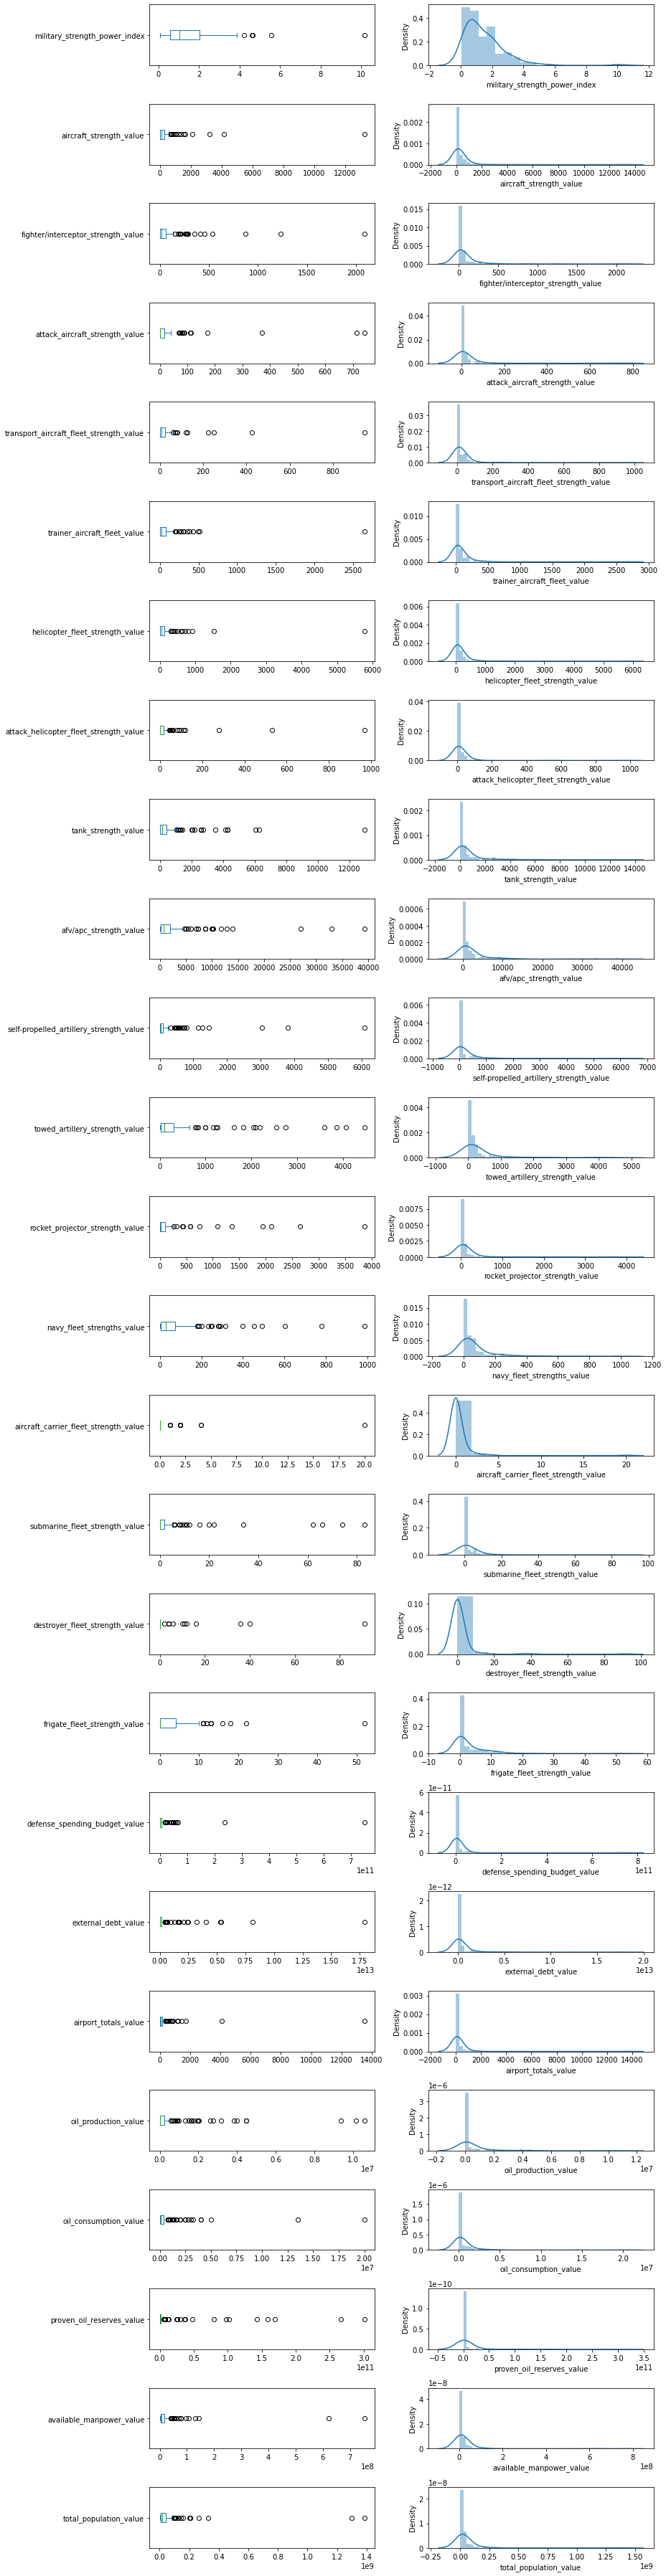

In [46]:
fig, axes = plt.subplots(26,2, figsize=(13,50))
ax = axes.flatten()
for i in range(26):
    df1.iloc[:,i].plot.box(vert=False,ax = ax[2*i])
    sns.distplot(df1.iloc[:,i], ax=ax[2*i+1])
plt.tight_layout()

In [47]:
df1[df1["military_strength_power_index"]>4]

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,...,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value
13,10.168,2,0,0,0,0,2,0,0,27,...,0.000,0.000,25120000.000,2671000000.000,2,0.000,2000.000,0.000,176808.000,766397.000
66,5.574,0,0,0,0,0,0,0,0,0,...,0.000,0.000,13000000.000,1036000000.000,29,0.000,4500.000,0.000,2226923.000,4809768.000
104,4.206,5,0,0,0,0,5,2,0,13,...,0.000,0.000,75500000.000,1615000000.000,8,0.000,9500.000,0.000,1432872.000,6312212.000
108,4.640,0,0,0,0,0,0,0,10,100,...,0.000,0.000,62200000.000,5300000000.000,61,0.000,6200.000,0.000,2702167.000,11259029.000
115,4.604,3,0,0,0,0,3,0,0,66,...,0.000,0.000,63000000.000,1700000000.000,55,17000.000,15100.000,83980000.000,132740.000,597927.000


In [48]:
df.loc[df1[df1["military_strength_power_index"]>4].index]["Military Strength"]

13           Bhutan
66          Liberia
104    Sierra Leone
108         Somalia
115        Suriname
Name: Military Strength, dtype: object

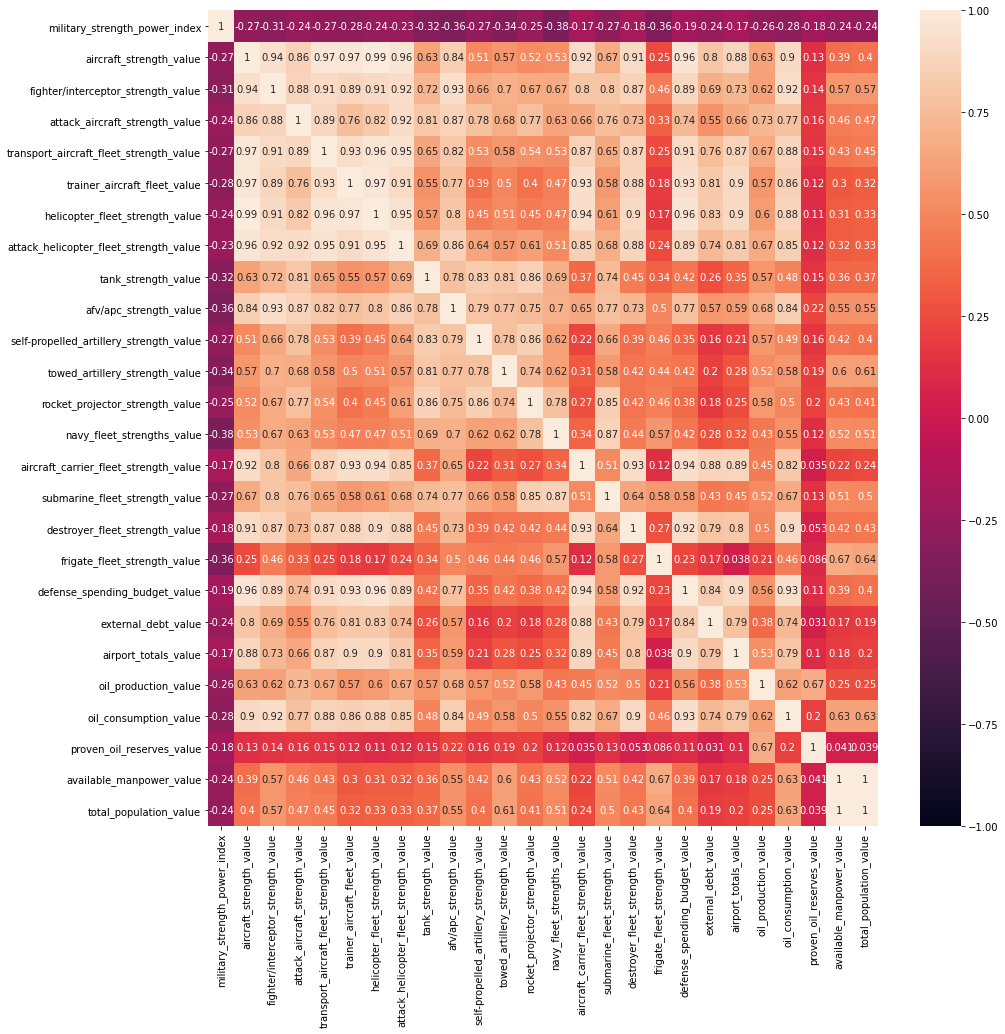

In [49]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),vmin=-1, annot=True);

In [50]:
df1.drop("total_population_value",axis=1, inplace=True)

total_population_value is highly corralated with manpower. So it was dropped. Also there are other highly correlated columns

# Data Preprocessing

In [64]:
scaler = StandardScaler()

In [65]:
df1_scaled = scaler.fit_transform(df1)

In [66]:
X = pd.DataFrame(df1_scaled, columns=df1.columns)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [73]:
hopkins(df1, df1.shape[0])

0.07000417602187245

In [74]:
hopkins(df1_scaled, df1.shape[0])

0.07529699704938077

Hopkins values are very close to 0 which means data is suitable for clustering.

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [75]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

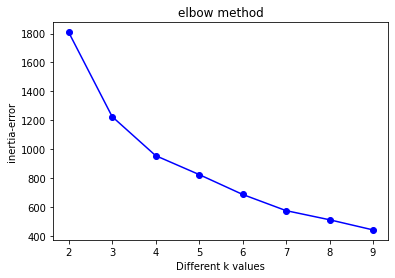

In [77]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

It is seem that elbow can be in k=3 or k=4.

In [78]:
ssd # sum of squared distance

[1809.2454971595648,
 1224.8708145734581,
 954.5862468173938,
 823.5846537776323,
 685.8567362928537,
 573.5847402497659,
 510.35815512786644,
 440.02086708261794]

In [79]:
pd.Series(ssd).diff()

0        NaN
1   -584.375
2   -270.285
3   -131.002
4   -137.728
5   -112.272
6    -63.227
7    -70.337
dtype: float64

In [80]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,584.375
3,270.285
4,131.002
5,137.728
6,112.272
7,63.227
8,70.337


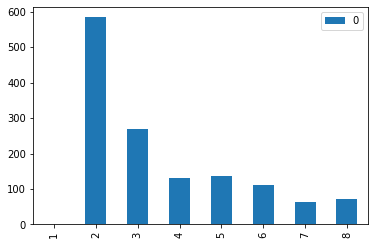

In [82]:
df_diff.plot(kind='bar');

It is seem that at k=4 sum of squared distance is less than both k=3 and k=5

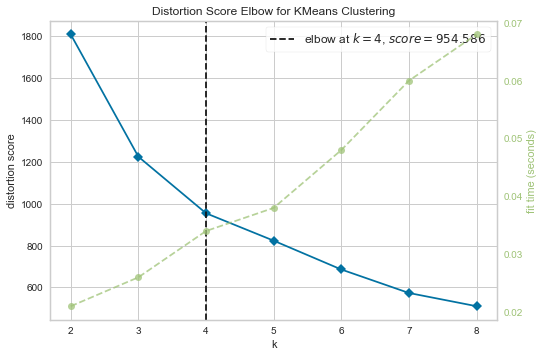

In [83]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

yellowbricks also choose k as 4

**Silhouette analysis**

In [86]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8637198352894576
For n_clusters=3, the silhouette score is 0.8360604305245597
For n_clusters=4, the silhouette score is 0.4876855526300685
For n_clusters=5, the silhouette score is 0.4849371559531312
For n_clusters=6, the silhouette score is 0.484561827295476
For n_clusters=7, the silhouette score is 0.42655860581792576
For n_clusters=8, the silhouette score is 0.4253366582579268


The silhouette score of k=2 and k=3 are higher than other k's.  

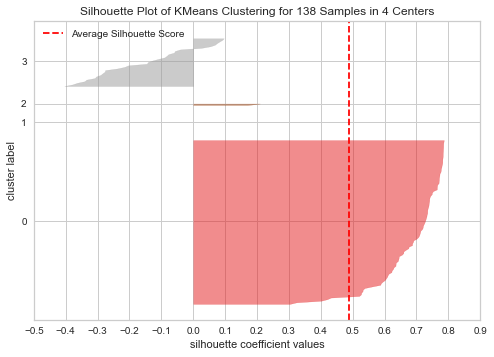

In [93]:
from yellowbrick.cluster import SilhouetteVisualizer

model4= KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

**It is concluded that k=4 is the most suitable k although silhouette score of k=4 is less than 3.**

### Model Building and label visualisation

In [133]:
model = KMeans(n_clusters=4, random_state=42)
model.fit_predict(X)

array([1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       3, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3,
       1, 3, 1, 1, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1,
       1, 3, 3, 1, 1, 1])

In [95]:
model.labels_

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3,
       0, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1, 0,
       0, 3, 3, 0, 0, 0])

In [96]:
clusters = model.labels_

In [97]:
X["predicted_clusters"] = clusters

In [98]:
X

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,...,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,predicted_clusters
0,-0.088,-0.105,-0.355,-0.008,-0.003,-0.345,0.064,-0.264,-0.428,-0.264,...,-0.187,-0.486,-0.030,-0.281,-0.204,-0.353,-0.322,-0.280,-0.132,0
1,0.647,-0.301,-0.355,-0.274,-0.329,-0.345,-0.261,-0.264,-0.428,-0.374,...,-0.187,-0.486,-0.205,-0.277,-0.237,-0.343,-0.305,-0.276,-0.284,0
2,-0.754,0.132,0.093,-0.040,0.313,0.017,0.199,0.200,0.155,0.904,...,-0.187,0.342,-0.015,-0.279,-0.110,0.434,-0.174,0.006,-0.056,3
3,-0.472,-0.076,-0.042,-0.082,-0.003,-0.149,-0.054,-0.110,-0.177,-0.351,...,-0.187,-0.486,-0.104,-0.259,-0.094,0.650,-0.287,-0.086,-0.228,0
4,-0.613,-0.132,-0.251,-0.199,-0.231,-0.078,-0.104,-0.264,-0.183,-0.324,...,0.251,-0.486,-0.146,-0.165,0.702,-0.064,-0.008,-0.229,-0.063,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,-0.618,-0.105,-0.190,-0.274,0.237,-0.003,-0.131,-0.161,-0.170,-0.350,...,-0.187,0.177,-0.198,-0.228,0.127,0.856,-0.059,6.784,-0.133,3
134,-0.837,-0.078,-0.020,-0.274,0.084,-0.195,-0.031,-0.006,1.304,0.008,...,-0.187,1.005,-0.127,-0.230,-0.203,-0.189,-0.082,-0.177,0.304,3
135,-0.166,-0.179,-0.020,-0.274,-0.242,-0.258,-0.180,-0.120,-0.018,-0.347,...,-0.187,-0.486,-0.188,-0.278,-0.193,-0.345,-0.258,-0.210,-0.168,0
136,0.141,-0.228,-0.277,-0.274,-0.209,-0.129,-0.245,-0.264,-0.379,-0.427,...,-0.187,-0.486,-0.208,-0.276,-0.167,-0.353,-0.315,-0.280,-0.229,0


In [104]:
clus_pred = X.groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2,3
military_strength_power_index,0.277,-1.061,-1.055,-0.827
aircraft_strength_value,-0.240,10.489,2.687,0.293
fighter/interceptor_strength_value,-0.281,8.730,4.231,0.387
attack_aircraft_strength_value,-0.223,7.318,5.635,0.147
transport_aircraft_fleet_strength_value,-0.234,9.944,3.193,0.259
trainer_aircraft_fleet_value,-0.250,10.670,1.345,0.407
helicopter_fleet_strength_value,-0.221,10.832,2.050,0.258
attack_helicopter_fleet_strength_value,-0.211,9.708,3.923,0.143
tank_strength_value,-0.297,3.737,5.019,0.553
afv/apc_strength_value,-0.332,6.820,5.107,0.563


<AxesSubplot:>

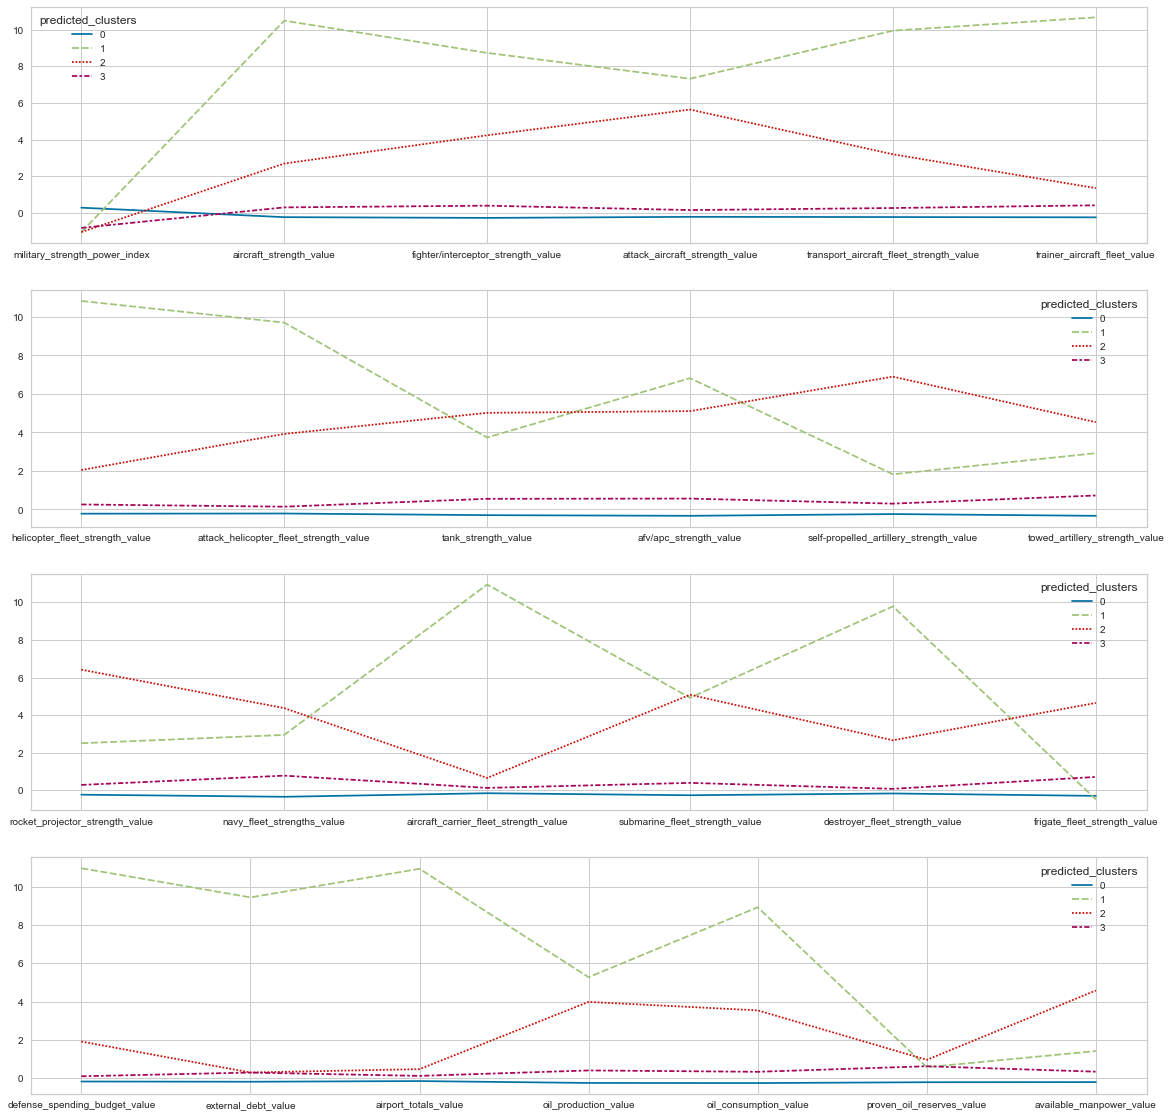

In [121]:
fig, axes = plt.subplots(4,1,figsize=(20,20))
ax = axes.flatten()
sns.lineplot(data = clus_pred.iloc[:6,:], ax=ax[0])
sns.lineplot(data = clus_pred.iloc[6:12,:], ax=ax[1])
sns.lineplot(data = clus_pred.iloc[12:18,:], ax=ax[2])
sns.lineplot(data = clus_pred.iloc[18:,:], ax=ax[3])

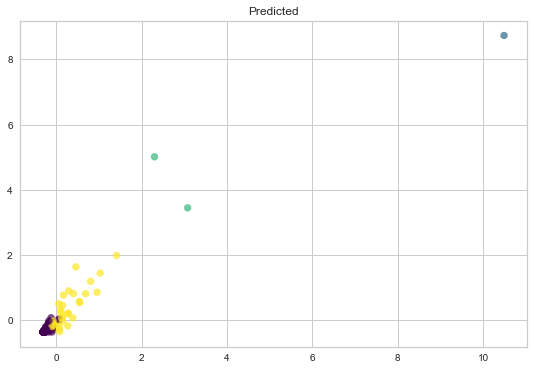

In [122]:
plt.figure(figsize = (20,6))

plt.subplot(122)
plt.scatter(X["aircraft_strength_value"], X["fighter/interceptor_strength_value"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7)
plt.title("Predicted");

In [126]:
X["predicted_clusters"].value_counts()

0    104
3     31
2      2
1      1
Name: predicted_clusters, dtype: int64

In [136]:
X[(X["predicted_clusters"]==2) | (X["predicted_clusters"]==1)]

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,...,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,predicted_clusters
26,-1.055,2.299,5.013,3.666,2.106,0.963,1.460,2.633,1.890,5.660,...,3.759,8.130,3.325,0.586,0.180,1.958,5.922,0.321,8.639,2
101,-1.056,3.075,3.449,7.605,4.280,1.726,2.639,5.212,8.148,4.554,...,1.567,1.171,0.507,0.011,0.768,6.017,1.168,1.598,0.525,2
130,-1.061,10.489,8.730,7.318,9.944,10.670,10.832,9.708,3.737,6.820,...,9.789,-0.486,10.974,9.449,10.941,5.278,8.930,0.577,1.418,1


In [130]:
ind_1_2 = X[(X["predicted_clusters"]==2) | (X["predicted_clusters"]==1)].index

In [131]:
df.iloc[ind_1_2,0]

26             China
101           Russia
130    United States
Name: Military Strength, dtype: object

### Evaluate 

In [146]:
X = pd.concat([X,df.iloc[:,0]], axis=1)

In [147]:
X[X["predicted_clusters"]>0].iloc[:,-2:].sort_values(by="predicted_clusters")

,predicted_clusters,Military Strength
130,1,United States
26,2,China
101,2,Russia
2,3,Algeria
91,3,Pakistan
102,3,Saudi Arabia
110,3,South Korea
112,3,Spain
118,3,Syria
119,3,Taiwan


### Conclusion
**US is separated from all other states by its military power and is a cluster on its own. Russia and China are also separated from all other states by their military forces and the two are a cluster. This result also coincides with the current political situation in the world. Apart from these countries, 31 countries with more military power than other countries constitute a cluster. The remaining countries are those with less military power. In K-Means clustering, if k was chosen as 3 then one cluster is US, one cluster is China and Russia and all the other countries are one cluster. In this case, we would not have made a correct clustering. Almost all features differed between clusters due to the large gap between America, China and Russia and other countries.**

### Let us drop US, Russia and China and cluster again.

In [176]:
X2 = X.drop(ind_1_2).iloc[:,:-2]

In [177]:
ssd2 = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X2)
    ssd2.append(model.inertia_)

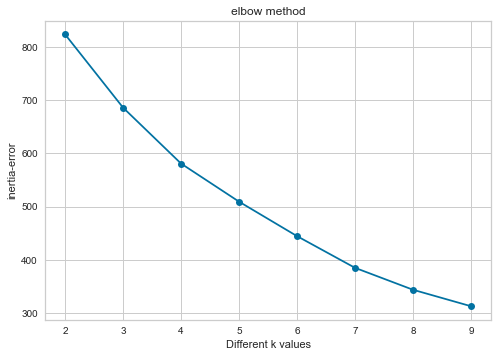

In [178]:
plt.plot(K, ssd2, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

There is no obvious elbow.

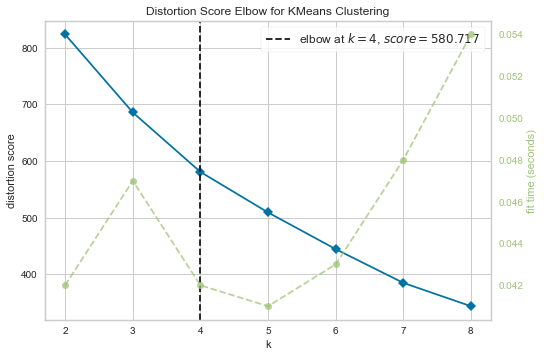

In [179]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

yellowbricks choose k as 4

*Silhouette analysis*

In [180]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4957135371965342
For n_clusters=3, the silhouette score is 0.4953298679020421
For n_clusters=4, the silhouette score is 0.3792918420767943
For n_clusters=5, the silhouette score is 0.363384610709251
For n_clusters=6, the silhouette score is 0.43676964390558914
For n_clusters=7, the silhouette score is 0.2414346091300252
For n_clusters=8, the silhouette score is 0.3093129321281595


The silhouette score of k=2 and k=3 are higher than other k's.  

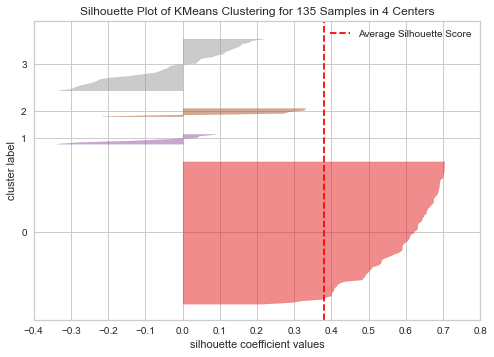

In [181]:
from yellowbrick.cluster import SilhouetteVisualizer

model4= KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

In [182]:
model = KMeans(n_clusters=4, random_state=42)
model.fit_predict(X2)

array([0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       2, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 3, 0,
       3, 0, 0, 0, 1, 3, 1, 2, 0, 3, 3, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 1, 0,
       3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 3, 1, 3,
       3, 0, 0, 0, 0, 0, 1, 3, 0, 0, 3, 0, 1, 0, 0, 3, 2, 3, 0, 0, 2, 3,
       0, 0, 0])

In [183]:
clusters = model.labels_
X2["predicted_clusters"] = clusters

In [184]:
X2 = pd.concat([X2,df.drop(ind_1_2).iloc[:,0]], axis=1)

In [185]:
X2["predicted_clusters"].value_counts()

0    89
3    33
1     7
2     6
Name: predicted_clusters, dtype: int64

In [186]:
X2[X2["predicted_clusters"]>0].iloc[:,-2:].sort_values(by="predicted_clusters")

,predicted_clusters,Military Strength
110,1,South Korea
51,1,Iran
49,1,India
118,1,Syria
35,1,Egypt
87,1,North Korea
124,1,Turkey
22,2,Canada
133,2,Venezuela
61,2,Kuwait


In [190]:
X2[X2["predicted_clusters"]==3].iloc[:,-1].values

array(['Algeria', 'Australia', 'Bangladesh', 'Brazil', 'Chile',
       'Colombia', 'Denmark', 'Finland', 'France', 'Germany', 'Greece',
       'Indonesia', 'Israel', 'Italy', 'Japan', 'Malaysia', 'Mexico',
       'Morocco', 'Myanmar', 'Netherlands', 'Norway', 'Pakistan', 'Peru',
       'Poland', 'Singapore', 'South Africa', 'South Sudan', 'Spain',
       'Taiwan', 'Thailand', 'Ukraine', 'United Kingdom', 'Vietnam'],
      dtype=object)

### Conclusion2
**When clustering was done by excluding America, Russia and China from the data, 4 clusters were formed. As a conclusion:**

Group1 : US

Group2 : Russia and China

Group3 : Egypt, India, Iran, North Korea, South Korea, Syria, Turkey

Group4 : Canada, Iraq, Kuwait, Saudi Arabia, United Arab Emirates, Venezuela

Group5 : Algeria, Australia, Bangladesh, Brazil, Chile,Colombia, Denmark, Finland, France, Germany, Greece,Indonesia, Israel, 
Italy, Japan, Malaysia, Mexico, Morocco, Myanmar, Netherlands, Norway, Pakistan, Peru, Poland, Singapore, South Africa, South Sudan, Spain,Taiwan, Thailand, Ukraine, United Kingdom, Vietnam

Group6 : Others

## Hierarchical Clustering

### Dendogram

In [228]:
X = X.iloc[:,:-2]

In [229]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

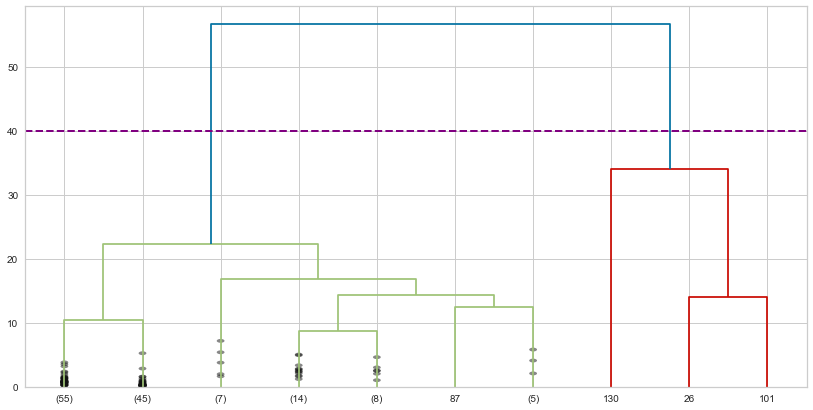

In [230]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           distance_sort=True,
           leaf_font_size = 10)
plt.axhline(y=40, c='purple', lw=2, linestyle='dashed');

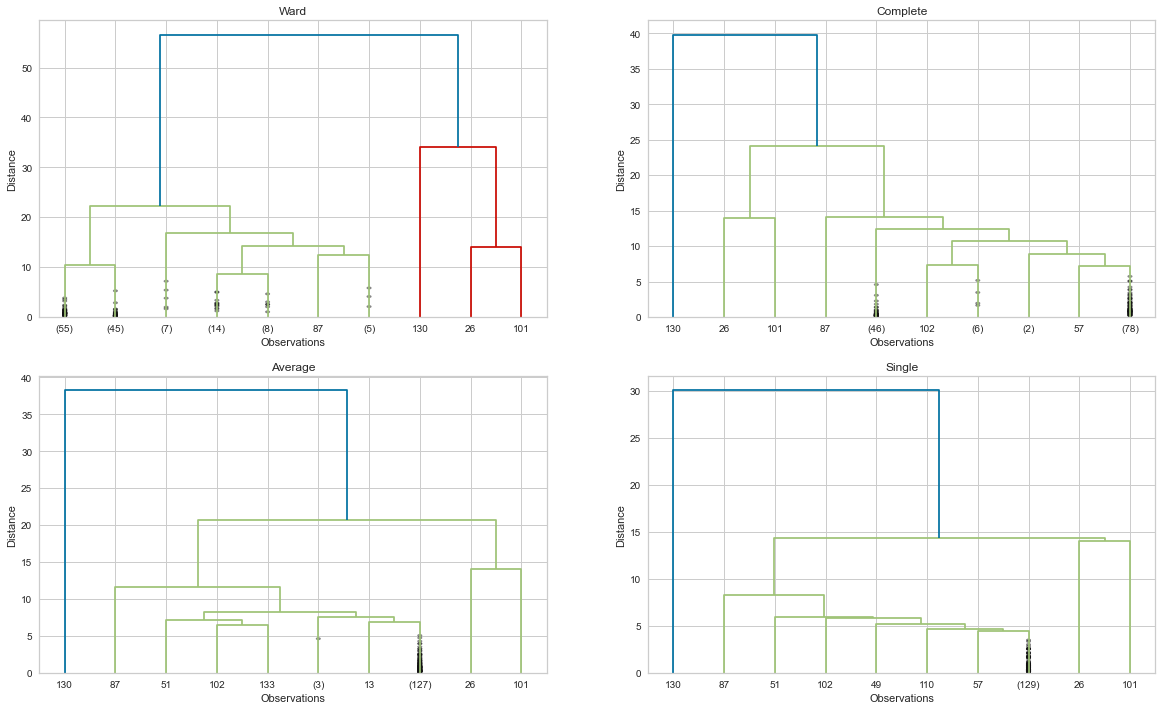

In [231]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [232]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.863471558890374
Silhouette Score for 3 clusters: 0.8331951995812523
Silhouette Score for 4 clusters: 0.4627680935538228
Silhouette Score for 5 clusters: 0.4723315311193119
Silhouette Score for 6 clusters: 0.44351131598913085
Silhouette Score for 7 clusters: 0.4408985390587775
Silhouette Score for 8 clusters: 0.4454306368279386
Silhouette Score for 9 clusters: 0.21424011627287737


### Final Model1

In [225]:
final_model1 = AgglomerativeClustering(n_clusters=2, affinity = "euclidean", linkage = "complete")
clusters = final_model1.fit_predict(X)

In [233]:
X2c = X.copy()

In [234]:
X2c["predicted_clusters"] = clusters
X2c["predicted_clusters"].value_counts()

0    137
1      1
Name: predicted_clusters, dtype: int64

In [235]:
final_model2 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "complete")
clusters = final_model2.fit_predict(X)

In [236]:
X3c = X.copy()

X3c["predicted_clusters"] = clusters
X3c["predicted_clusters"].value_counts()

In [238]:
final_model3 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "complete")
clusters = final_model3.fit_predict(X)

In [239]:
X4c = X.copy()

In [240]:
X4c["predicted_clusters"] = clusters
X4c["predicted_clusters"].value_counts()

2    134
0      2
3      1
1      1
Name: predicted_clusters, dtype: int64

### Drop US, Russia and China and cluster again.

In [218]:
X2 = X2.iloc[:,:-2]

In [219]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

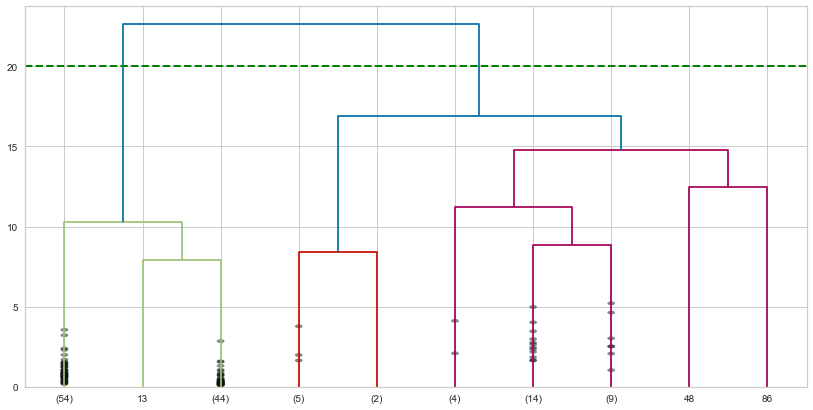

In [221]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           distance_sort=True,
           leaf_font_size = 10)
plt.axhline(y=20, c='green', lw=2, linestyle='dashed');

In [247]:
final_model4 = AgglomerativeClustering(n_clusters=2, affinity = "euclidean", linkage = "complete")
clusters = final_model4.fit_predict(X2)

In [248]:
X2_2c = X2.copy()

X2_2c["predicted_clusters"] = clusters
X2_2c["predicted_clusters"].value_counts()

1    133
0      2
Name: predicted_clusters, dtype: int64

### Model Building and label visualisation

In [253]:
final_model = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "complete")
clusters = final_model.fit_predict(X2)

In [254]:
X2_4c = X2.copy()

X2_4c["predicted_clusters"] = clusters
X2_4c["predicted_clusters"].value_counts()

0    76
1    57
2     1
3     1
Name: predicted_clusters, dtype: int64

## Conclusion
**According to the maximum distance between clusters it can be choosen two clusters.But if cluster number was choosen as 2, then US is one cluster, other countries are one cluster. If cluster number was choosen as 3, then US is one cluster, Russia and China is one cluster and other countries are one cluster.  If cluster number was choosen as 4, then US is one cluster, Russia is one, China is one and other countries are one cluster. Instead, if US, China and Russia were dropped  ***

### Comparison

**For this data K-means gives more appropriate results.**